In [1]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Steps :

In [10]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement if any
# we will make a website with streamlit

### 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# drop last 3 columns since most of the values of these columns are null.
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [15]:
df.sample(3)

,v1,v2
3885,ham,"Same, I'm at my great aunts anniversary party ..."
349,ham,Just checking in on you. Really do miss seeing...
3125,ham,U coming 2 pick me?


In [17]:
# Since v1 and v2 are not very intutive, we are going to change the names of the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(3)

,target,text
3750,ham,"Haha... Sounds crazy, dunno can tahan anot..."
1858,ham,"Sir, i am waiting for your call."
5144,ham,I'm in office now da:)where are you?


In [19]:
# Now we will convert ham and spam to 0 and 1
# we are using label encoder here because it is our target/responce variable.
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [20]:
df['target']=encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# check for duplicated rows and missing values
df.duplicated().sum()

403

In [24]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
# remove duplicate rows
df=df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

## Exploratory Data Analysis

<Axes: xlabel='target'>

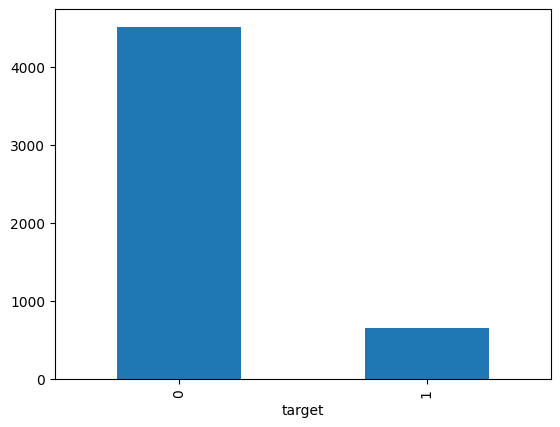

In [30]:
df['target'].value_counts().plot(kind='bar')

In [31]:
import matplotlib.pyplot as plt

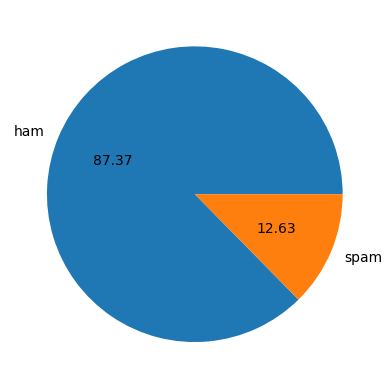

In [34]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [35]:
# Data is imbalanced

In [36]:
import nltk

In [41]:
#Now we will do some deep analysis
# we will find no of characters, no of words and no of sentences in the text column and make separate columns for them.

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepanshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
df['num_char'] = df['text'].apply(len)

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_14692\3778023891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [40]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_14692\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [45]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_14692\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [47]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [52]:
df[df['target']==0].describe() #ham messages

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [53]:
df[df['target']==1].describe() #spam messages

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [54]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

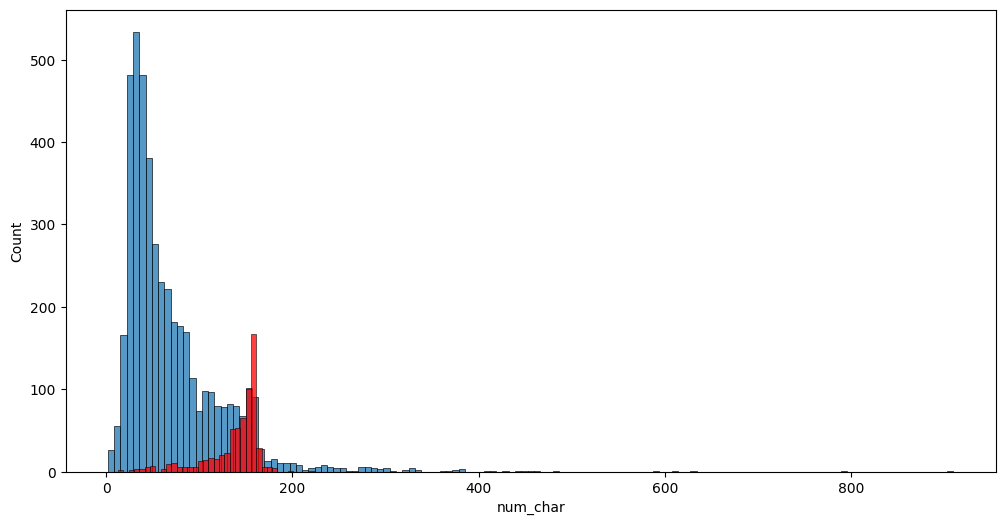

In [62]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

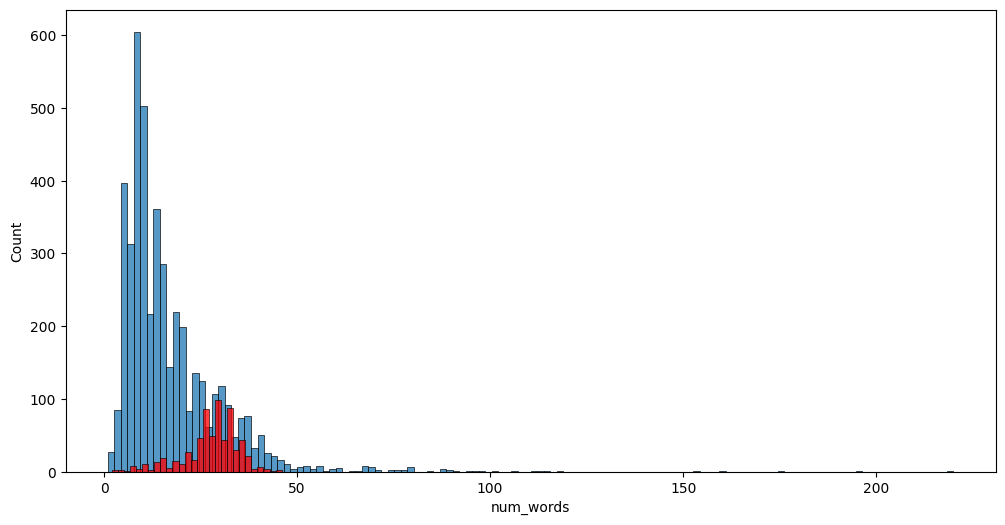

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\Deepanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


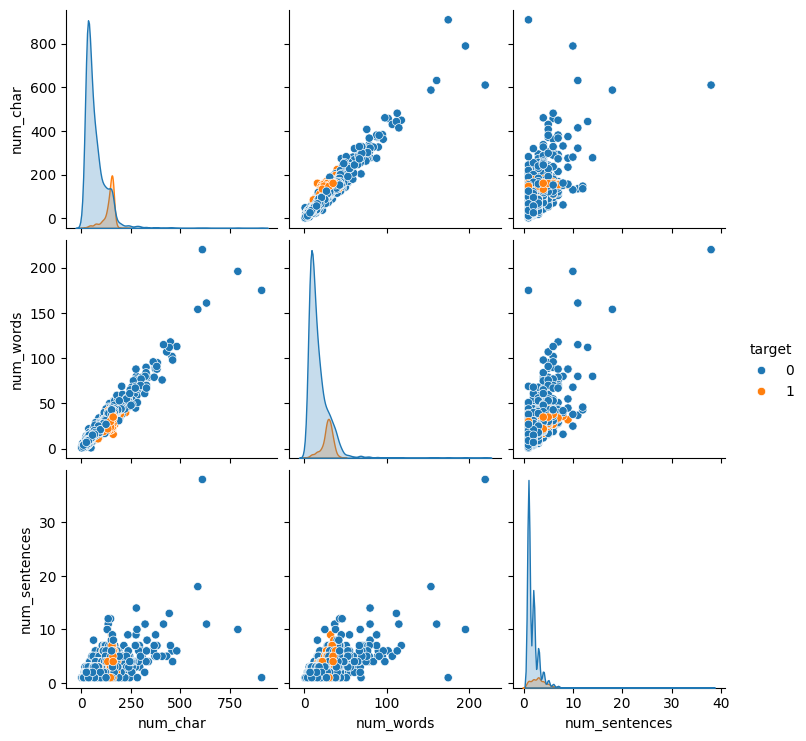

In [65]:
sns.pairplot(df,hue='target')

In [72]:
# from the above pairplot we can observe many features have linear relationship and also there are few outliers present in our data.

<Axes: >

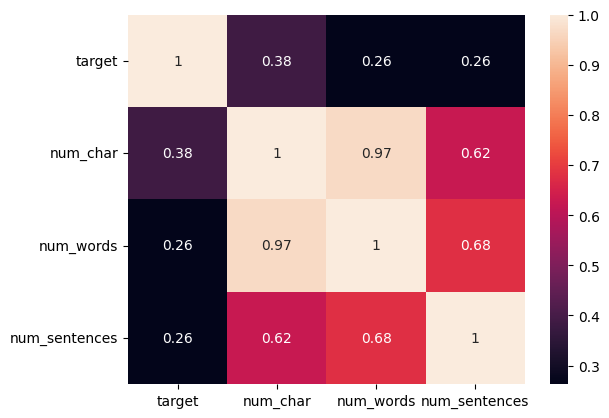

In [70]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [71]:
# From the above heatmap we got to know:
#target var has high corr with num_char
#num_char and num_words have high corr
#num_sentences has also high corr with num_char and num_words
# It is implying there is multicollinearity in the data and if we have to keep a particular column then we will go with num_char as it also has high corr with target variable.

## 3. Data Preprocessing

- Lower case
- Tokenization
- Removing Special charecters
- Removing stop words and puntuation
- stemming

In [90]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] #cloning
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) 
            
    return " ".join(y) #converting to string
    

In [91]:
transform_text('Hi, I am Deepanshu, your boss, I loved that you see my jupyter notebook')

'hi deepanshu boss love see jupyt notebook'

In [75]:
from nltk.corpus import stopwords

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepanshu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [79]:
stopwords.words('english') #List of stopwords in nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [87]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [92]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_14692\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [93]:
df.sample(3)

,target,text,num_char,num_words,num_sentences,transformed_text
3122,0,He telling not to tell any one. If so treat fo...,59,16,2,tell tell one treat hi hi hi
1266,0,\Hey sorry I didntgive ya a a bellearlier hunny,47,9,1,sorri didntgiv ya bellearli hunni
3259,0,I'm always looking for an excuse to be in the ...,51,13,1,alway look excus citi


In [95]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB 1.9 MB/s eta 0:00:01
   ------------------ --------------------- 71.7/151.4 kB 1.3 MB/s eta 0:00:01
   ----------------------- --------------- 92.2/151.4 kB 871.5 kB/s eta 0:00:01
   ------------------------------ ------- 122.9/151.4 kB 798.9 kB/s eta 0:00:01
   ------------------------------ ------- 122.9/151.4 kB 798.9 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 603.4 kB/s eta 0:00:00


In [106]:
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='black')

In [107]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

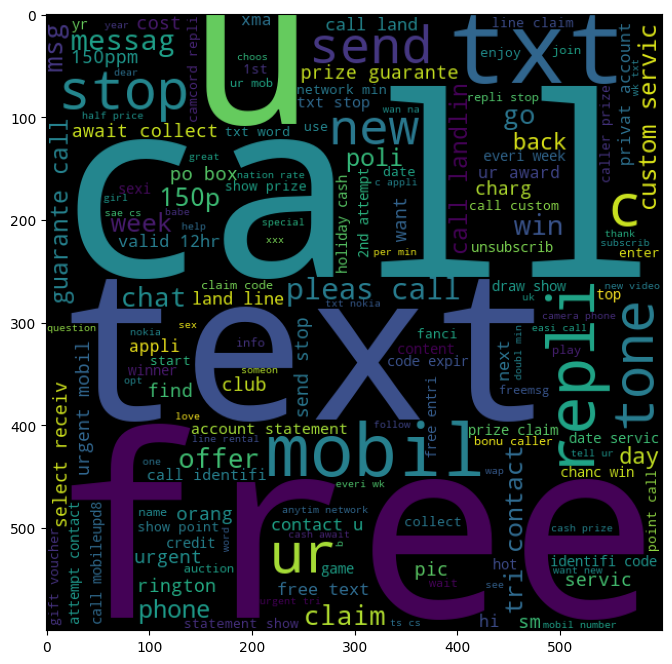

In [110]:
plt.figure(figsize=(17,8))
plt.imshow(spam_wc)

In [111]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

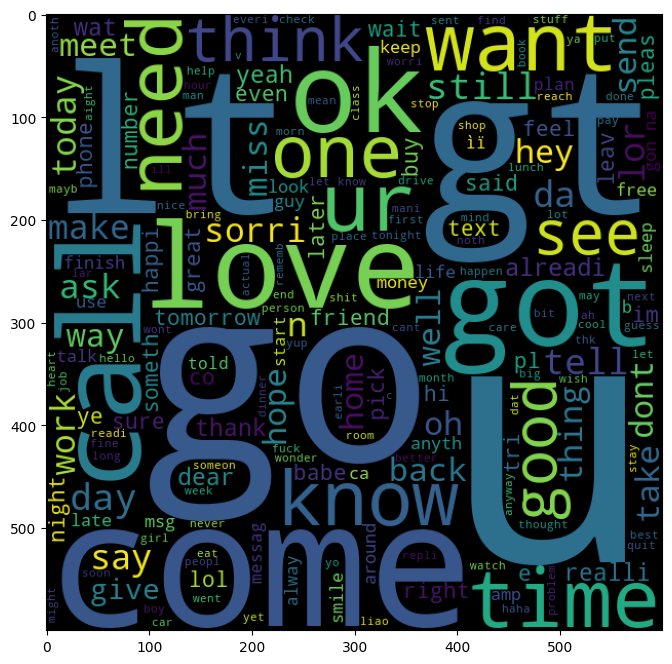

In [112]:
plt.figure(figsize=(17,8))
plt.imshow(ham_wc)

In [123]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
    for words in i.split():
        spam_corpus.append(words)
        

In [124]:
len(spam_corpus)

9939

In [127]:
from collections import Counter
spam50=pd.DataFrame(Counter(spam_corpus).most_common(50)) #finding most common spam words

In [129]:
spam50.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


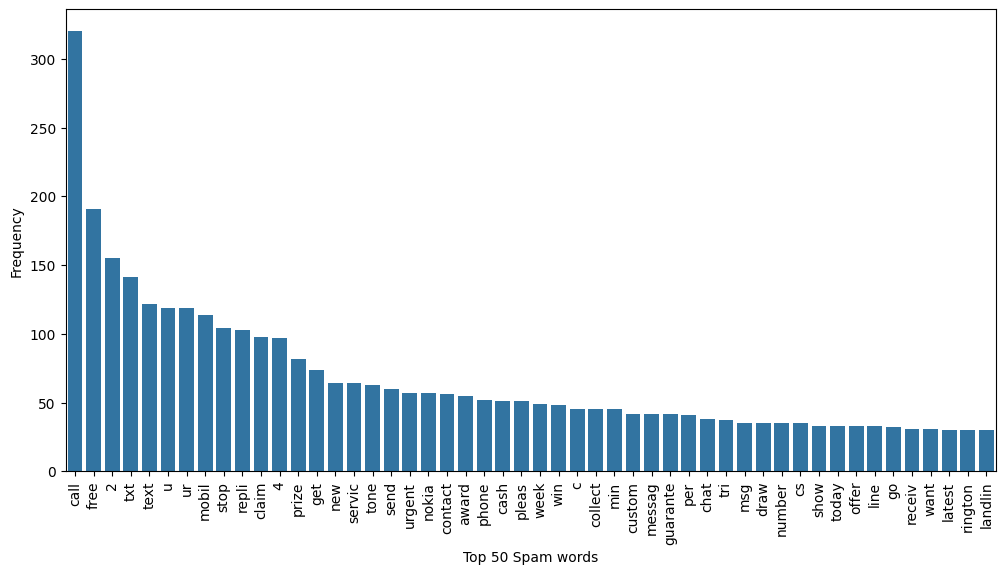

In [143]:
plt.figure(figsize=(12,6))
sns.barplot(x=spam50[0],y=spam50[1])
plt.xlabel('Top 50 Spam words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [134]:
ham_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
    for words in i.split():
        ham_corpus.append(words)

In [135]:
len(ham_corpus)

35404

In [136]:
from collections import Counter
ham50=pd.DataFrame(Counter(ham_corpus).most_common(50)) #finding most common spam words

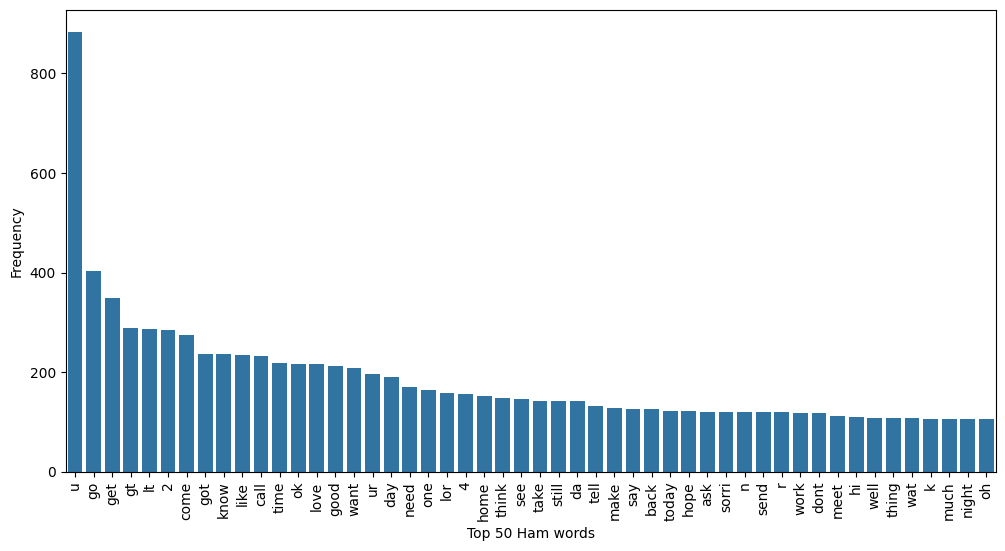

In [142]:
plt.figure(figsize=(12,6))
sns.barplot(x=ham50[0],y=ham50[1])
plt.xlabel('Top 50 Ham words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [144]:
df.sample()

,target,text,num_char,num_words,num_sentences,transformed_text
3296,1,Todays Voda numbers ending 5226 are selected t...,157,29,2,today voda number end 5226 select receiv 350 a...


In [145]:
# For model building we need numeric data, so now we have to convert our text into numeric form.
# We will do text vectorization using bag of words technique

In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [181]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [182]:
X.shape

(5169, 3000)

In [183]:
y=df['target'].values

In [184]:
from sklearn.model_selection import train_test_split


In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [186]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [187]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()


In [188]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) #Precision is more imp factor when data is imbalanced

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [189]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [190]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [174]:
# We chose tfidf --> mnb since it has maximum precision score

In [175]:
# Now we will try with different ML algorithms.

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [178]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [191]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [192]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [193]:
performance_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [196]:
performance_df=performance_df.reset_index(drop=True)

In [197]:
performance_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000
1,NB,0.970986,1.000000
2,RF,0.975822,0.982906
3,SVC,0.975822,0.974790
4,ETC,0.974855,0.974576
5,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
7,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
9,BgC,0.958414,0.868217


 After applying the above ML algorithms we concluded that (NB: Naive Bayes)--> (mnb: MuntinomailNM) gives overall best precision and accuracy.

In [198]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))